In [1]:
from diffusers import DDPMPipeline

In [2]:
image_pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")
image_pipe.to("cuda")

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.11.1",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

In [3]:
images = image_pipe().images

  0%|          | 0/1000 [00:00<?, ?it/s]

In [4]:
len(images)

1

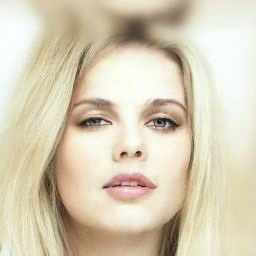

In [5]:
images[0]

In [6]:
image_pipe

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.11.1",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

In [7]:
from diffusers import UNet2DModel

repo_id = "google/ddpm-church-256"
model = UNet2DModel.from_pretrained(repo_id)

In [8]:
model

UNet2DModel(
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=128, out_features=512, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=512, out_features=512, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0): ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
        (1): ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (c

In [9]:
model.config

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('act_fn', 'silu'),
            ('attention_head_dim', None),
            ('norm_num_groups', 32),
            ('norm_eps', 

In [10]:
model_random = UNet2DModel(**model.config)

In [11]:
model_random.save_pretrained("my_model")

In [13]:
!ls my_model

config.json  diffusion_pytorch_model.bin


In [14]:
model_random = UNet2DModel.from_pretrained("my_model")

In [15]:
import torch

torch.manual_seed(0)

noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)
noisy_sample.shape

torch.Size([1, 3, 256, 256])

In [16]:
noisy_sample

tensor([[[[-1.1258, -1.1524, -0.2506,  ...,  0.1447,  1.9029,  0.3904],
          [-0.0394, -0.8015, -0.4955,  ..., -1.6989,  1.3094, -1.6613],
          [-0.5461, -0.6302, -0.6347,  ...,  1.6553,  0.5204, -0.2326],
          ...,
          [-0.8026,  1.1278,  0.8593,  ..., -0.0460,  1.3617, -0.9553],
          [ 0.0612, -2.1941, -1.3787,  ...,  0.6552, -1.6092,  0.5488],
          [ 0.5376, -0.9151,  0.4535,  ...,  0.1389,  0.2619, -1.4578]],

         [[ 0.0193,  0.4089,  0.1344,  ..., -0.0858,  0.4548, -0.4195],
          [-0.5346,  0.5238, -1.3947,  ..., -0.2734, -0.0894,  2.0659],
          [ 0.0826, -2.0857,  0.4422,  ...,  3.0676,  0.7324, -1.7681],
          ...,
          [ 0.4593, -0.3560, -1.5880,  ...,  0.3783, -1.4930,  1.7592],
          [-0.1452, -0.5655,  1.2794,  ...,  0.4163, -0.2368, -0.8566],
          [-0.9930, -0.9963, -0.3417,  ..., -1.8353,  1.0419, -0.6321]],

         [[ 1.5554,  2.8047,  1.4670,  ...,  0.0654, -0.2915, -0.1090],
          [ 0.0875, -1.0140,  

In [17]:
with torch.no_grad():
    noisy_residual = model(sample=noisy_sample, timestep=2).sample

In [18]:
noisy_residual.shape

torch.Size([1, 3, 256, 256])

In [19]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler.from_config(repo_id)

/opt/conda/lib/python3.7/site-packages/diffusers/configuration_utils.py:195: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddpm.DDPMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


In [20]:
scheduler.config

FrozenDict([('num_train_timesteps', 1000),
            ('beta_start', 0.0001),
            ('beta_end', 0.02),
            ('beta_schedule', 'linear'),
            ('trained_betas', None),
            ('variance_type', 'fixed_small'),
            ('clip_sample', True),
            ('prediction_type', 'epsilon'),
            ('_class_name', 'DDPMScheduler'),
            ('_diffusers_version', '0.1.1')])

In [21]:
scheduler.save_config("my_scheduler")

In [22]:
!ls my_scheduler

scheduler_config.json


In [23]:
new_scheduler = DDPMScheduler.from_config("my_scheduler")

In [24]:
less_noisy_sample = scheduler.step(model_output = noisy_residual, timestep=2, sample = noisy_sample).prev_sample
less_noisy_sample.shape

torch.Size([1, 3, 256, 256])

In [25]:
import PIL.Image
import numpy as np

def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

In [27]:
model.to('cuda')
noisy_sample = noisy_sample.to('cuda')

  5%|███▉                                                                             | 49/1000 [00:02<00:36, 26.26it/s]

'Image at step 50'

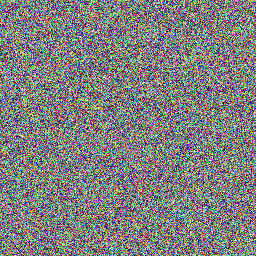

 10%|███████▊                                                                         | 97/1000 [00:03<00:33, 26.77it/s]

'Image at step 100'

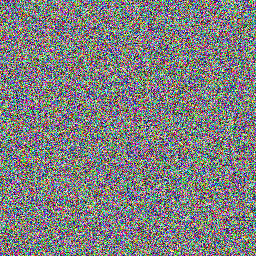

 15%|███████████▊                                                                    | 148/1000 [00:05<00:31, 27.03it/s]

'Image at step 150'

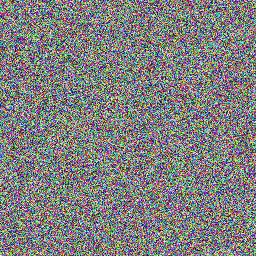

 20%|███████████████▉                                                                | 199/1000 [00:07<00:30, 26.09it/s]

'Image at step 200'

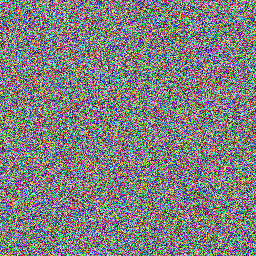

 25%|███████████████████▊                                                            | 247/1000 [00:09<00:28, 26.87it/s]

'Image at step 250'

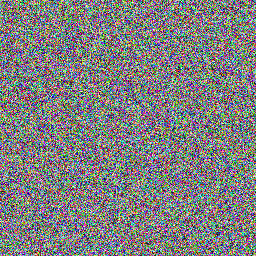

 30%|███████████████████████▉                                                        | 299/1000 [00:11<00:25, 27.01it/s]

'Image at step 300'

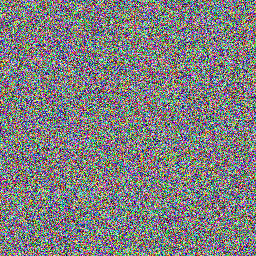

 35%|███████████████████████████▊                                                    | 347/1000 [00:13<00:24, 26.55it/s]

'Image at step 350'

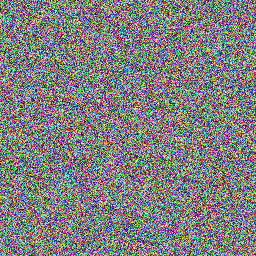

 40%|███████████████████████████████▉                                                | 399/1000 [00:15<00:23, 26.07it/s]

'Image at step 400'

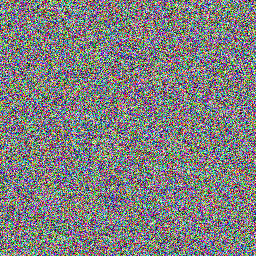

 45%|███████████████████████████████████▊                                            | 447/1000 [00:17<00:20, 26.96it/s]

'Image at step 450'

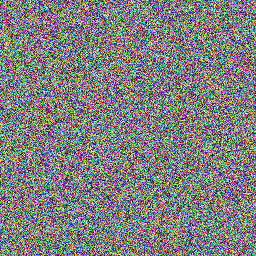

 50%|███████████████████████████████████████▊                                        | 498/1000 [00:19<00:18, 26.95it/s]

'Image at step 500'

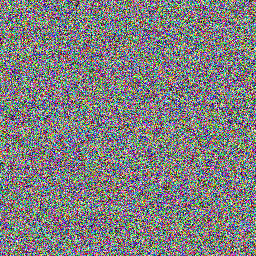

 55%|███████████████████████████████████████████▉                                    | 549/1000 [00:21<00:16, 27.10it/s]

'Image at step 550'

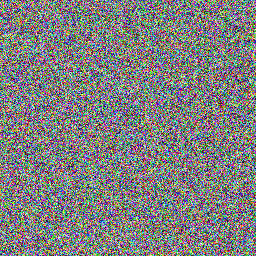

 60%|███████████████████████████████████████████████▊                                | 597/1000 [00:22<00:15, 26.72it/s]

'Image at step 600'

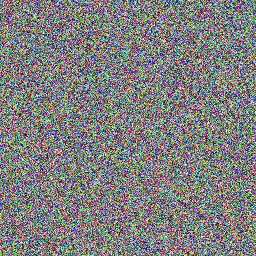

 65%|███████████████████████████████████████████████████▊                            | 648/1000 [00:24<00:13, 26.36it/s]

'Image at step 650'

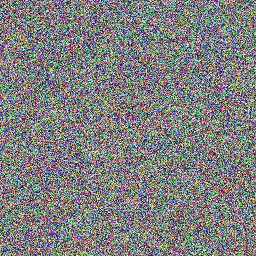

 70%|███████████████████████████████████████████████████████▉                        | 699/1000 [00:26<00:11, 26.74it/s]

'Image at step 700'

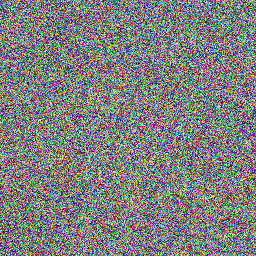

 75%|███████████████████████████████████████████████████████████▊                    | 747/1000 [00:28<00:09, 27.22it/s]

'Image at step 750'

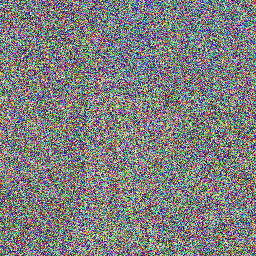

 80%|███████████████████████████████████████████████████████████████▊                | 798/1000 [00:30<00:07, 26.98it/s]

'Image at step 800'

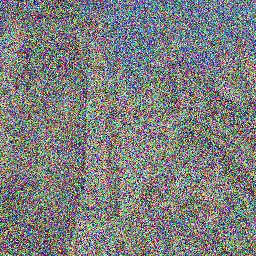

 85%|███████████████████████████████████████████████████████████████████▉            | 849/1000 [00:32<00:05, 26.94it/s]

'Image at step 850'

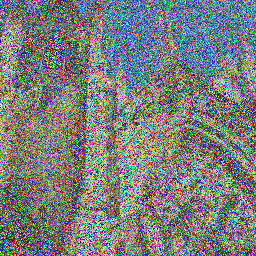

 90%|███████████████████████████████████████████████████████████████████████▊        | 897/1000 [00:34<00:03, 26.31it/s]

'Image at step 900'

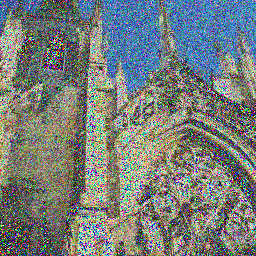

 95%|███████████████████████████████████████████████████████████████████████████▊    | 948/1000 [00:36<00:01, 26.42it/s]

'Image at step 950'

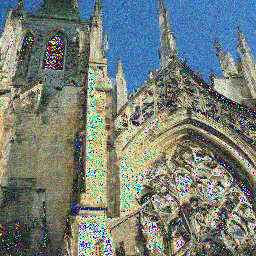

100%|███████████████████████████████████████████████████████████████████████████████▉| 999/1000 [00:38<00:00, 25.84it/s]

'Image at step 1000'

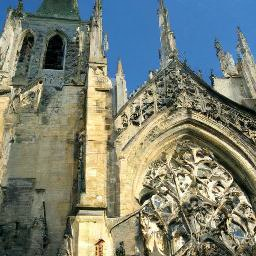

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 26.14it/s]


In [28]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
  # 1. predict noise residual
  with torch.no_grad():
      residual = model(sample, t).sample

  # 2. compute less noisy image and set x_t -> x_t-1
  sample = scheduler.step(residual, t, sample).prev_sample

  # 3. optionally look at image
  if (i + 1) % 50 == 0:
      display_sample(sample, i + 1)

In [29]:
from diffusers import DDIMScheduler

scheduler = DDIMScheduler.from_config(repo_id)

/opt/conda/lib/python3.7/site-packages/diffusers/configuration_utils.py:195: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddim.DDIMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


In [30]:
scheduler.config

FrozenDict([('num_train_timesteps', 1000),
            ('beta_start', 0.0001),
            ('beta_end', 0.02),
            ('beta_schedule', 'linear'),
            ('trained_betas', None),
            ('clip_sample', True),
            ('set_alpha_to_one', True),
            ('steps_offset', 0),
            ('prediction_type', 'epsilon'),
            ('_class_name', 'DDPMScheduler'),
            ('_diffusers_version', '0.1.1'),
            ('variance_type', 'fixed_small')])

In [31]:
scheduler.set_timesteps(num_inference_steps=50)

 18%|███████████████                                                                     | 9/50 [00:00<00:02, 19.09it/s]

'Image at step 10'

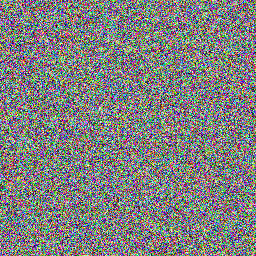

 36%|█████████████████████████████▉                                                     | 18/50 [00:00<00:01, 23.90it/s]

'Image at step 20'

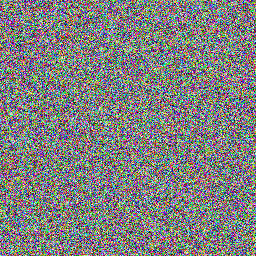

 54%|████████████████████████████████████████████▊                                      | 27/50 [00:01<00:00, 25.44it/s]

'Image at step 30'

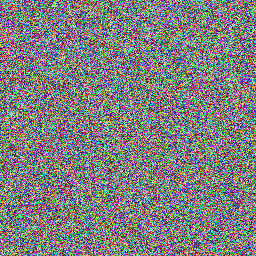

 78%|████████████████████████████████████████████████████████████████▋                  | 39/50 [00:01<00:00, 26.30it/s]

'Image at step 40'

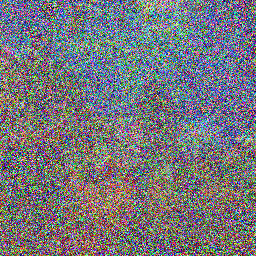

 96%|███████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:02<00:00, 25.44it/s]

'Image at step 50'

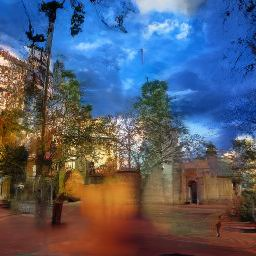

100%|███████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 22.70it/s]


In [32]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
  # 1. predict noise residual
  with torch.no_grad():
      residual = model(sample, t).sample

  # 2. compute previous image and set x_t -> x_t-1
  sample = scheduler.step(residual, t, sample).prev_sample

  # 3. optionally look at image
  if (i + 1) % 10 == 0:
      display_sample(sample, i + 1)